In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from math import pi
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
# import folium
from ast import literal_eval
import json


import ast

import sys
import os


import matplotlib.gridspec as gridspec
# import folium
# from folium import FeatureGroup
from matplotlib import style
style.use('seaborn-darkgrid')


# import keplergl



from datetime import datetime

from sklearn import preprocessing


%matplotlib inline
# sns.set_style("seaborn-darkgrid")

# Read data

In [2]:
def Get_ModelData_WithLabels():
    #kmean results
    kmean_results_labels = pd.read_csv(
        'results/kmeans_results_all_TimeZoneCorrected_08202021_only10PCs.csv')
    #kmeans_results_all_TimeZoneCorrected_08202021.csv')
    # kmean_results

    #model data
    kmean_results = pd.read_csv(
        '_Data/model data/model_data_TimeZoneCorrected_08192021.csv'
    )  #model_data_TimeZoneCorrected_08192021.csv')
    # PCA_model_data

    #add labels to the model data
    kmean_results['KMeans_15_labels'] = literal_eval(
        kmean_results_labels[kmean_results_labels['Cluster_no'] ==
                             15]['Kmeans_label_list'].values.tolist()[0])

    kmean_results['StartTime_decimal'] = kmean_results.apply(
        lambda x: x['StartTime_decimal'] + 24
        if x['StartTime_decimal'] <= 6 else x['StartTime_decimal'],
        axis=1)

    #add flag for trips starting or ending at Vanderbilt and Parks
    kmean_results['VANDERBILT_trip'] = kmean_results.apply(
        lambda x: 1
        if (x['VANDERBILT_start'] == 1) | (x['VANDERBILT_end'] == 1) else 0,
        axis=1)

    kmean_results['PARK_trip'] = kmean_results.apply(
        lambda x: 1 if (x['PARK_start'] == 1) | (x['PARK_end'] == 1) else 0,
        axis=1)

    print(kmean_results.shape)
    print(kmean_results.columns)

    return kmean_results


kmean_results = Get_ModelData_WithLabels()
kmean_results.head()

(1050497, 50)
Index(['Unnamed: 0', 'trip_id', 'GRID_ID_start', 'GRID_ID_end',
       'enthropy_start', 'MEAN_CBD_start', 'MEAN_URBAN_start', 'MEAN_SU_start',
       'MEAN_RURAL_start', 'MEAN_POP_D_start', 'MEAN_EMP_D_start',
       'MEAN_PAKING_start', 'intersection_density_start', 'enthropy_end',
       'MEAN_CBD_end', 'MEAN_URBAN_end', 'MEAN_SU_end', 'MEAN_RURAL_end',
       'MEAN_POP_D_end', 'MEAN_EMP_D_end', 'MEAN_PAKING_end',
       'intersection_density_end', 'PARK_start', 'VANDERBILT_start',
       'NISSAN_start', 'PARK_end', 'VANDERBILT_end', 'NISSAN_end',
       'tripDistance_miles', 'tripDistance', 'tripDuration',
       'euclidean_distance', 'StartTime_decimal', 'route_directness_rawDist',
       'route_directness_trace', 'average_trip_speed_mph',
       'trip_start_week_no', 'trip_start_hour_no', 'StartTime_AMPeak',
       'StartTime_Day', 'StartTime_PMPeak', 'StartTime_Night', 'weekend_trip',
       'high_trip_count_day', 'DATE_str', 'PRCP', 'TAVG', 'KMeans_15_labels',
   

,Unnamed: 0,trip_id,GRID_ID_start,GRID_ID_end,enthropy_start,MEAN_CBD_start,MEAN_URBAN_start,MEAN_SU_start,MEAN_RURAL_start,MEAN_POP_D_start,...,StartTime_PMPeak,StartTime_Night,weekend_trip,high_trip_count_day,DATE_str,PRCP,TAVG,KMeans_15_labels,VANDERBILT_trip,PARK_trip
0,0,9,DN-110,DR-111,0.928214,0.90,0.00,0.0,0.0,15831.781111,...,0,0,0,0,2018-09-01,0.02,79,13,0,0
1,1,10,DK-106,DL-107,0.598365,0.35,0.55,0.0,0.0,3230.462036,...,0,0,0,0,2018-09-01,0.02,79,8,0,1
2,2,11,DO-110,DM-106,0.830590,0.90,0.00,0.0,0.0,6957.366348,...,0,0,0,0,2018-09-01,0.02,79,13,0,0
3,3,12,DM-110,DN-110,0.865962,0.90,0.00,0.0,0.0,6847.949890,...,0,0,0,0,2018-09-01,0.02,79,13,0,0
4,4,13,DO-110,DM-106,0.830590,0.90,0.00,0.0,0.0,6957.366348,...,0,0,0,0,2018-09-01,0.02,79,13,0,0


In [3]:
def Link_OriginDesitination_Coords(kmean_results):
    trip_data = pd.read_csv(
        '_Data/trip data/start_end_points_cleaned_TimeZoneCorrected_08192021.csv')
    trip_data['startDateTime'] = pd.to_datetime(
        trip_data['startDateTime'], utc=True).dt.tz_convert('US/Central')

    kmeans_results_linkCoords=pd.merge(kmean_results,
             trip_data[['trip_id','startLatitude','startLongitude','endLatitude',
                        'endLongitude','weekend_trip','startDateTime']],
             on='trip_id',
             how='left')
    kmeans_results_linkCoords.to_csv(
        '_Data/model data/ClusteringResults_Interpretation_TimeZoneCorrected_08222021_v1.csv')       

    return kmeans_results_linkCoords

kmeans_results_linkCoords=Link_OriginDesitination_Coords(kmean_results)
kmeans_results_linkCoords[['trip_id','startDateTime','DATE_str']].to_csv(
    '_Data/model data/tripID_NewClusters_08252021.csv')


kmeans_results_linkCoords.head()

,Unnamed: 0,trip_id,GRID_ID_start,GRID_ID_end,enthropy_start,MEAN_CBD_start,MEAN_URBAN_start,MEAN_SU_start,MEAN_RURAL_start,MEAN_POP_D_start,...,TAVG,KMeans_15_labels,VANDERBILT_trip,PARK_trip,startLatitude,startLongitude,endLatitude,endLongitude,weekend_trip_y,startDateTime
0,0,9,DN-110,DR-111,0.928214,0.90,0.00,0.0,0.0,15831.781111,...,79,13,0,0,36.1651,-86.7785,36.1622,-86.7683,0,2018-09-01 07:13:22-05:00
1,1,10,DK-106,DL-107,0.598365,0.35,0.55,0.0,0.0,3230.462036,...,79,8,0,1,36.1760,-86.7871,36.1733,-86.7857,0,2018-09-01 07:14:46-05:00
2,2,11,DO-110,DM-106,0.830590,0.90,0.00,0.0,0.0,6957.366348,...,79,13,0,0,36.1643,-86.7770,36.1750,-86.7819,0,2018-09-01 07:15:11-05:00
3,3,12,DM-110,DN-110,0.865962,0.90,0.00,0.0,0.0,6847.949890,...,79,13,0,0,36.1642,-86.7811,36.1647,-86.7803,0,2018-09-01 07:46:21-05:00
4,4,13,DO-110,DM-106,0.830590,0.90,0.00,0.0,0.0,6957.366348,...,79,13,0,0,36.1643,-86.7771,36.1749,-86.7819,0,2018-09-01 07:18:32-05:00


# Interpreting individual clusters

## functions for plotting

In [4]:
rename_variables = {
    'tripDistance_miles': 'Trip distance (miles)',
    'tripDuration': 'Trip duration (minutes)',
    'route_directness_trace': 'Route directness ratio',
    'average_trip_speed_mph': 'Average trip speed (mph)',
    'high_trip_count_day': 'Trips on special event',
    'weekend_trip': 'Weekend trips',
    'StartTime_AMPeak': 'Trip during 7 am and 10 am',
    'StartTime_Day': 'Trip during 10 am and 4 pm',
    'StartTime_PMPeak': 'Trip during 4 pm and 8 pm',
    'StartTime_Night': 'Trip during 8 pm and 7 am',
    'PRCP': 'Average daily precipitation',
    'TAVG': 'Average daily temperature',
    'MEAN_CBD_start': 'Proportion of CBD land use at origin',
    'MEAN_URBAN_start': 'Proportion of urban land use at origin',
    'MEAN_SU_start': 'Proportion of sub-urban land use at origin',
    'MEAN_RURAL_start': 'Proportion of rural land use at origin',
    'MEAN_POP_D_start': 'Average population density at origin',
    'MEAN_EMP_D_start': 'Average employment density at origin',
    'MEAN_PAKING_start': 'Average parking density at origin',
    'intersection_density_start':
    'Intersection density (per sq. miles) at origin',
    'enthropy_start': 'Entropy at origin',
    'MEAN_CBD_end': 'Proportion of CBD land use at destination',
    'MEAN_URBAN_end': 'Proportion of urban land use at destination',
    'MEAN_SU_end': 'Proportion of sub-urban land use at destination',
    'MEAN_RURAL_end': 'Proportion of rural land use at destination',
    'MEAN_POP_D_end': 'Average population density at destination',
    'MEAN_EMP_D_end': 'Average employment density at destination',
    'MEAN_PAKING_end': 'Average parking density at destination',
    'intersection_density_end':
    'Intersection density (per sq. miles) at destination',
    'enthropy_end': 'Entropy at destination'
}

rename_variables_spyder = {
    'tripDistance_miles': 'Trip distance',
    'tripDuration': 'Trip duration',
    'route_directness_trace': 'Route directness ratio',
    'average_trip_speed_mph': 'Average trip speed',
    'high_trip_count_day': 'Special event trips',
    'weekend_trip': 'Weekend trips',
    'StartTime_AMPeak': 'Trip during 7 am and 10 am',
    'StartTime_Day': 'Trip during 10 am and 4 pm',
    'StartTime_PMPeak': 'Trip during 4 pm and 8 pm',
    'StartTime_Night': 'Trip during 8 pm and 7 am',
    'PRCP': 'Average daily precipitation',
    'TAVG': 'Temperature',
    'MEAN_CBD_start': 'Origin CBD',
    'MEAN_URBAN_start': 'Origin urban',
    'MEAN_POP_D_start': 'Origin population',
    'MEAN_EMP_D_start': 'Origin employment',
    'enthropy_start': 'Origin enthropy',
    'MEAN_CBD_end': 'Destination CBD',
    'MEAN_URBAN_end': 'Destination urban',
    'MEAN_POP_D_end': 'Destination population',
    'MEAN_EMP_D_end': 'Destination employment',
    'enthropy_end': 'Destination enthropy',
    'VANDERBILT_trip':'Vanderbilt trips', 
    'PARK_trip':'Park trips'
}

In [5]:
labels = [
    'MEAN_CBD_start', 'MEAN_URBAN_start', 'MEAN_POP_D_start',
    'MEAN_EMP_D_start', 'enthropy_start', 'MEAN_CBD_end', 'MEAN_URBAN_end',
    'MEAN_POP_D_end', 'MEAN_EMP_D_end', 'enthropy_end'
]

[rename_variables_spyder[label] for label in labels]

['Origin CBD',
 'Origin urban',
 'Origin population',
 'Origin employment',
 'Origin enthropy',
 'Destination CBD',
 'Destination urban',
 'Destination population',
 'Destination employment',
 'Destination enthropy']

In [6]:
def get_scaled_data(spyder_plot_vars):

    #combine variables 
    var_spyder_mean = spyder_plot_vars['trip']['mean'] + spyder_plot_vars[
        'spatial']['mean']
    var_spyder_median = spyder_plot_vars['trip']['median'] + spyder_plot_vars[
        'spatial']['median']

    var_spyder_all = var_spyder_median + var_spyder_mean

    # slice variable of interest
    data_for_sypder_plot = kmean_results[var_spyder_median + var_spyder_mean]

    # #standarize the data
    scaler = preprocessing.StandardScaler()#.MinMaxScaler()
    data_for_sypder_plot_scaled = pd.DataFrame(
        scaler.fit_transform(data_for_sypder_plot), columns=var_spyder_all)
    #add cluster label column to the scaled data
    data_for_sypder_plot_scaled[cluster_label_var] = kmean_results[
        cluster_label_var]


    data_for_sypder_plot_scaled
    
    return data_for_sypder_plot_scaled

In [7]:
# def grouped_temporal_plot(subplot_data, group_clusters, ax):

#     for individual_cluster in group_clusters:
#         sns.kdeplot(subplot_data[subplot_data[cluster_label_var] ==
#                                  individual_cluster]['StartTime_decimal'],
#                     clip=(0, 30),
#                     label=str('C' + str(individual_cluster)),
#                     color=custom_palette[individual_cluster])
# #                     ax=ax)
#         plt.xlim(6, 30)
#         plt.xticks(np.arange(6, 31, 6),
#                    ['6 am', '12 pm', '6 pm', '12 am', '6 am'])

#         #     plt.xticks(np.arange(6, 25, 6))
#         plt.yticks(np.arange(0, 0.2, 0.05), ['', '0.05', '0.1', '0.15'])

#         plt.legend()

#     plt.tight_layout(h_pad=3.0)
#     plt.xlabel('Hour of the day')


#     return plt
def grouped_temporal_plot(subplot_data, individual_cluster, ax, plot_color):

    fig = plt.figure()
    sns.kdeplot(subplot_data[subplot_data[cluster_label_var] ==
                             individual_cluster]['StartTime_decimal'],
                clip=(0, 30),
                label=str('C' + str(individual_cluster)),
                color=plot_color,
                ax=ax)
    ax.set_xlim(6, 30)
    ax.set_xticks(np.arange(6, 31, 6))
    ax.set_xticklabels(('6 am', '12 pm', '6 pm', '12 am', '6 am'))
#     ax.set_xticks(np.arange(6, 31, 6), ['6 am', '12 pm', '6 pm', '12 am', '6 am'])

    #     plt.xticks(np.arange(6, 25, 6))
#     plt.yticks(np.arange(0, 0.2, 0.05), ['', '0.05', '0.1', '0.15'])
    ax.set_ylim(0, 0.6)
    ax.set_yticks(np.arange(0, 0.6, 0.1))
    ax.set_yticklabels(('' , '0.1', '0.2', '0.3', '0.4', '0.5'))

#     plt.legend()

#     plt.tight_layout(h_pad=3.0)
    ax.set_xlabel('Hour of the day')
    ax.set_ylabel('Proportion of trips')
    ax.grid(True)

    return None
#     return plt

In [8]:
def plot_sypder_plot(individual_cluster_data_scaled, individual_cluster,
                     spyder_plot_vars,spyder_plot_type, ax, plot_color):

    #     individual_cluster = 1
    #
    #     ax
    #     plot_color

    selected_vars_spyder_plot = spyder_plot_vars[spyder_plot_type][
        'median'] + spyder_plot_vars[spyder_plot_type]['mean']

    # #get dataframe of one cluster
    individual_cluster_data_scaled = data_for_sypder_plot_scaled[
        data_for_sypder_plot_scaled[cluster_label_var] ==
        individual_cluster][selected_vars_spyder_plot]
    individual_cluster_data_scaled

    #concate mean and median columns and sum them to get one column
    stats = pd.concat([
        individual_cluster_data_scaled.
        loc[:, spyder_plot_vars[spyder_plot_type]['median']].median(axis=0),
        individual_cluster_data_scaled.
        loc[:, spyder_plot_vars[spyder_plot_type]['mean']].mean(axis=0)
    ],
                      axis=1)

    stats = stats.sum(axis=1)
    angles = np.linspace(0,
                         2 * np.pi,
                         len(selected_vars_spyder_plot),
                         endpoint=False)

    # close the plot
    stats = np.concatenate((stats, [stats[0]]))
    angles = np.concatenate((angles, [angles[0]]))
    labels = [*selected_vars_spyder_plot, selected_vars_spyder_plot[0]]
    labels=[rename_variables_spyder[label] for label in labels]

    fig = plt.figure()
    #ax = fig.add_subplot(111, polar=True)
    ax.plot(angles,
            stats,
            'o-',
            markersize=2,
            linewidth=1.5,
            color=plot_color,
            label=str('C' + str(individual_cluster)))
    ax.fill(angles, stats, alpha=0.05)
#     ax.set_thetagrids(angles[:19] * 180 / np.pi, labels)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_yticklabels([])
    #     ax.set_title(str('C' + str(cluster_number)))
    ax.tick_params(axis='both', which='major', pad=15)
    
    ax.grid(True)
    
    plt.tight_layout()

    return None


# individual_cluster = 1
# selected_vars_spyder_plot = spyder_plot_vars['trip'][
#     'median'] + spyder_plot_vars['trip']['mean']
# ax
# plot_color

# plot_sypder_plot(individual_cluster_data_scaled,
#                  individual_cluster=10,
#                  selected_vars_spyder_plot=spyder_plot_vars['trip']['median'] +
#                  spyder_plot_vars['trip']['mean'],
#                  ax=plt.figure(figsize=(4, 9)),
#                  plot_color=sns.color_palette("deep", 16)[0])

## Export data for scooter corral

In [11]:
def reclassify_cluster(cluster_group_dict,cluster_value_for_reclassify):
    try:
        for keys in cluster_group_dict.keys():
            if cluster_value_for_reclassify in cluster_group_dict[keys]['clusters']:
                return(cluster_group_dict[keys]['Label'])
    except:
        return None

In [13]:
cluster_group_scootercorral_dict = {
    'Group1': {
        'Label': 'Morning work/school',
        'clusters': [8, 13]
    },
    'Group2': {
        'Label': 'Daytime short errand',
        'clusters': [2,4, 12]
    },
    'Group3': {
        'Label': 'Social',
        'clusters': [3,10,14]
    },
    'Group4': {
        'Label': 'Nighttime entertainment districts',
        'clusters': [6, 7,11]
    },
    'Group5': {
        'Label': 'Utilitarian',
        'clusters': [0, 1, 5,9]
    },
#     'Group6': {
#         'Label': 'Recreational',
#         'clusters': [4, 11]
#     }
}

scooter_corral_df=kmean_results.copy()

scooter_corral_df['reclassified_cluster'] = scooter_corral_df.apply(
    lambda x: reclassify_cluster(cluster_group_scootercorral_dict, x['KMeans_15_labels']),
    axis=1)

reclassifed_clusters_list = [
    'Morning work/school', 'Daytime short errand', 'Utilitarian',
    'Social', 'Nighttime entertainment districts'
]

scooter_corral_df['reclassified_cluster_ID'] = scooter_corral_df.apply(
    lambda x: str(reclassifed_clusters_list.index(x['reclassified_cluster'])), axis=1)

print(scooter_corral_df.columns)
# scooter_corral_df.head

#save data
scooter_corral_df[['trip_id','KMeans_15_labels','reclassified_cluster',
       'reclassified_cluster_ID']].to_csv('_Data/Model results/scooter corral/trip_clusterIDs_DateTimeCorrected110321.csv')
scooter_corral_df.to_csv('_Data/Model results/scooter corral/LabelledModelData_DateTimeCorrected110321.csv')

Index(['Unnamed: 0', 'trip_id', 'GRID_ID_start', 'GRID_ID_end',
       'enthropy_start', 'MEAN_CBD_start', 'MEAN_URBAN_start', 'MEAN_SU_start',
       'MEAN_RURAL_start', 'MEAN_POP_D_start', 'MEAN_EMP_D_start',
       'MEAN_PAKING_start', 'intersection_density_start', 'enthropy_end',
       'MEAN_CBD_end', 'MEAN_URBAN_end', 'MEAN_SU_end', 'MEAN_RURAL_end',
       'MEAN_POP_D_end', 'MEAN_EMP_D_end', 'MEAN_PAKING_end',
       'intersection_density_end', 'PARK_start', 'VANDERBILT_start',
       'NISSAN_start', 'PARK_end', 'VANDERBILT_end', 'NISSAN_end',
       'tripDistance_miles', 'tripDistance', 'tripDuration',
       'euclidean_distance', 'StartTime_decimal', 'route_directness_rawDist',
       'route_directness_trace', 'average_trip_speed_mph',
       'trip_start_week_no', 'trip_start_hour_no', 'StartTime_AMPeak',
       'StartTime_Day', 'StartTime_PMPeak', 'StartTime_Night', 'weekend_trip',
       'high_trip_count_day', 'DATE_str', 'PRCP', 'TAVG', 'KMeans_15_labels',
       'VANDERBIL

## Create plots

In [55]:
cluster_group_dict = {
    'Group1': {
        'Label': 'Morning work/school',
        'clusters': [8, 13]
    },
    'Group2': {
        'Label': 'Daytime short errand',
        'clusters': [2,4, 12]
    },
    'Group3': {
        'Label': 'Social',
        'clusters': [3,10,11,14]
    },
    'Group4': {
        'Label': 'Nighttime entertainment districts',
        'clusters': [6, 7]
    },
    'Group5': {
        'Label': 'Utilitarian',
        'clusters': [0, 1, 5,9]
    },
#     'Group6': {
#         'Label': 'Recreational',
#         'clusters': [4, 11]
#     }
}

spyder_plot_vars_dict = {
    'trip': {
        'mean': ['high_trip_count_day', 'weekend_trip'],
        'median': [
            'tripDistance_miles',
            'tripDuration',
            'route_directness_trace',
            'average_trip_speed_mph',
            'TAVG',
        ]
    },
    'spatial': {
        'mean': ['VANDERBILT_trip', 'PARK_trip'],
        'median': [
            'MEAN_CBD_start', 'MEAN_URBAN_start', 'MEAN_POP_D_start',
            'MEAN_EMP_D_start', 'enthropy_start', 'MEAN_CBD_end',
            'MEAN_URBAN_end', 'MEAN_POP_D_end', 'MEAN_EMP_D_end',
            'enthropy_end'
        ]
    }
}

cluster_label_var = 'KMeans_15_labels'
number_of_plot = len(cluster_group_dict)
total_clusters = kmean_results[cluster_label_var].max() + 1

# get scaled data
data_for_sypder_plot_scaled = get_scaled_data(
    spyder_plot_vars=spyder_plot_vars_dict)

style.use('seaborn-darkgrid')
# defind colour pallet
custom_palette = sns.color_palette("deep", total_clusters)

## Trip information spyder plot

Group1


<ipython-input-56-7808cdeeb007>:54: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([h1, h2, h3],     # The line objects


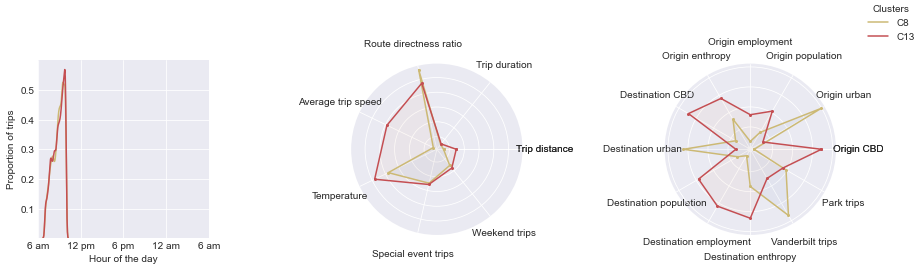

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Group2


<ipython-input-56-7808cdeeb007>:54: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([h1, h2, h3],     # The line objects


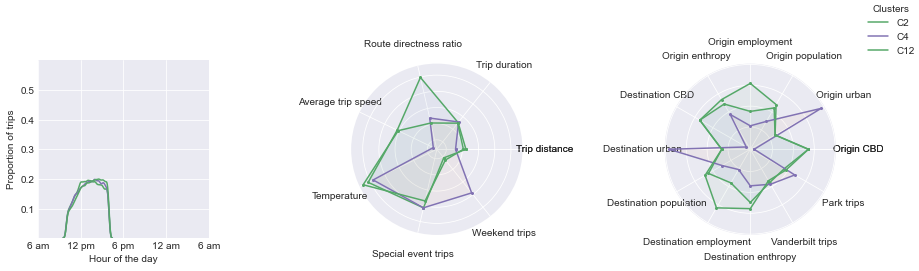

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Group3


<ipython-input-56-7808cdeeb007>:54: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([h1, h2, h3],     # The line objects


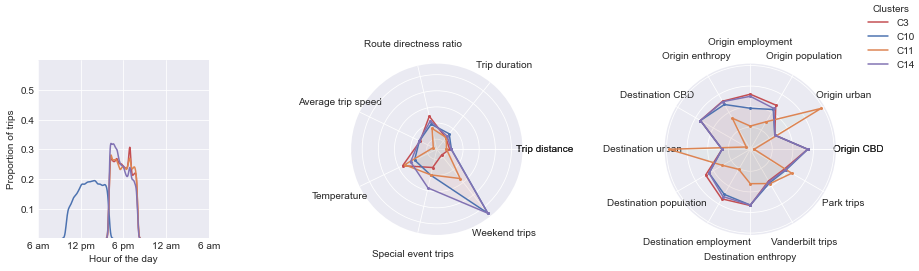

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Group4


<ipython-input-56-7808cdeeb007>:54: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([h1, h2, h3],     # The line objects


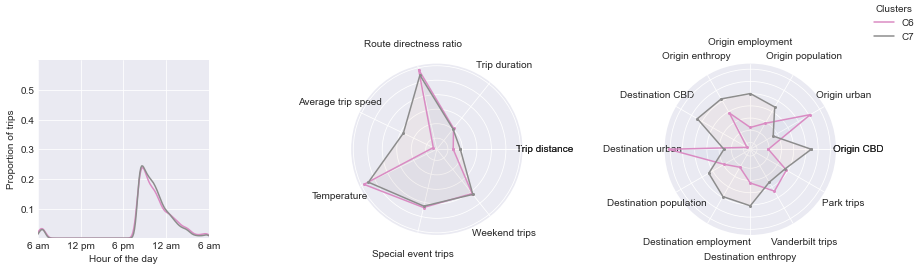

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Group5


<ipython-input-56-7808cdeeb007>:54: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([h1, h2, h3],     # The line objects


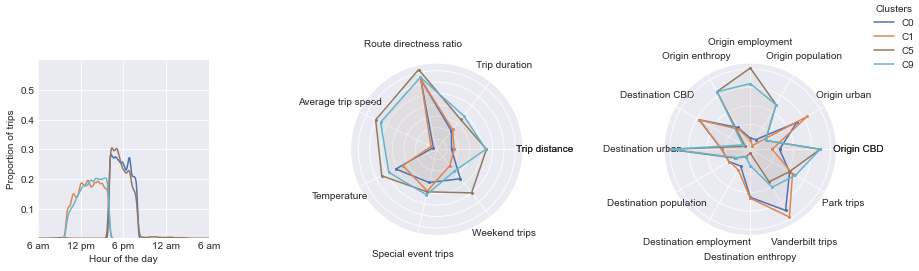

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [56]:
style.use('seaborn-darkgrid')


# fig_outer = plt.figure(figsize=(13, 14))
#     #fig.suptitle('K mean cluster 10')

# gspec = gridspec.GridSpec(len(cluster_group_dict.keys()), 1)
# ax = [plt.subplot(gspec[row, 0], polar=False) for row in np.arange(0,len(cluster_group_dict.keys()))]


for groups in cluster_group_dict.keys():
    print(groups)
    fig = plt.figure(figsize=(13, 4))
    #fig.suptitle('K mean cluster 10')

    gspec = gridspec.GridSpec(1, 3)
    ax1 = plt.subplot(gspec[0, 0], polar=False)
    ax2 = plt.subplot(gspec[0, 1], polar=True)
    ax3 = plt.subplot(gspec[0, 2], polar=True)

    # get list of clusters in group
    group_clusters = cluster_group_dict[groups]['clusters']

#     group_clusters = cluster_group_dict['Group1']['clusters']
    for individual_cluster in group_clusters:
        #     print(individual_cluster)

        # get data for group clusters only
        subplot_data = kmean_results[kmean_results[cluster_label_var].isin(
            group_clusters)][[cluster_label_var, 'StartTime_decimal']]
        h1 = grouped_temporal_plot(subplot_data,
                                   individual_cluster,
                                   ax=ax1,
                                   plot_color=custom_palette[individual_cluster])
#         ax1.set_title('Temporal', fontsize=12, fontweight='bold',y=0.001)

        h2 = plot_sypder_plot(
            data_for_sypder_plot_scaled,
            individual_cluster,
            spyder_plot_vars=spyder_plot_vars_dict,
            spyder_plot_type='trip',
            ax=ax2,
            plot_color=custom_palette[individual_cluster])

        h3 = plot_sypder_plot(
            data_for_sypder_plot_scaled,
            individual_cluster,
            spyder_plot_vars=spyder_plot_vars_dict,
            spyder_plot_type='spatial',
            ax=ax3,
            plot_color=custom_palette[individual_cluster])

    # Create the legend
    fig.legend([h1, h2, h3],     # The line objects
               # The labels for each line
               labels=[str('C'+str(cluster_no))
                       for cluster_no in group_clusters],
               loc="upper right",   # Position of legend
               borderaxespad=0.1,    # Small spacing around legend box
               title="Clusters"  # Title for the legend
               )
    fig.tight_layout(pad=3)
    plt.show()

    fig.suptitle(cluster_group_dict[groups]['Label'], fontsize=15, y=0.1)
    fig.savefig(str('results/individual clusters/StandardProcessing_plot_K15_' +
                str(groups)+'_V10_10012021.png'), dpi=900)

In [ ]:
# fig_outer = plt.figure(figsize=(13, 14), constrained_layout=False)
# outer_grid = fig_outer.add_gridspec(4, 1, wspace=0, hspace=0)
# outer_grid[0].plot('Group1')
#     #fig.suptitle('K mean cluster 10')

# # for row in range(4):

# #     inner_grid = outer_grid[row, 0].subgridspec(1, 3, wspace=0, hspace=0)
# #     axs = inner_grid.subplots()
    
# #     print(len(axs))

# # gspec = gridspec.GridSpec(4, 1)

# # ax1 = plt.subplot(gspec[0, 0], polar=False)
# # ax2 = plt.subplot(gspec[1, 0], polar=False)
# # ax3 = plt.subplot(gspec[2, 0], polar=False)
# # ax4 = plt.subplot(gspec[3, 0], polar=False)

# # inner_grid = ax1.subgridspec(1, 3, wspace=0, hspace=0)
# fig_outer.tight_layout(pad=3)
# plt.show()

## Descriptive stat

In [58]:
var_spyder_median = [
    'tripDistance_miles',
    'tripDuration',
    'route_directness_trace',
    'average_trip_speed_mph',

    'TAVG',
    'MEAN_CBD_start',
    'MEAN_URBAN_start',
    'MEAN_POP_D_start',
    'MEAN_EMP_D_start',
    'MEAN_PAKING_start',
    #     'intersection_density_start',
    'enthropy_start',
    'MEAN_CBD_end',
    'MEAN_URBAN_end',
    'MEAN_POP_D_end',
    'MEAN_EMP_D_end',
    'MEAN_PAKING_end',
    #     'intersection_density_end',
    'enthropy_end'
]

var_spyder_mean = ['high_trip_count_day', 'weekend_trip','StartTime_AMPeak',
       'StartTime_Day', 'StartTime_PMPeak', 'StartTime_Night']



var_spyder_all = var_spyder_median + var_spyder_mean




cluster_number = 15
selected_cluster_to_group = ['KMeans_15_labels']  # ['reclassified_cluster']


# descriptive stats
summary_median = kmean_results[var_spyder_median +
                               selected_cluster_to_group].groupby(selected_cluster_to_group).agg(
                                   [np.mean])
summary_mean = kmean_results[var_spyder_mean +
                             selected_cluster_to_group].groupby(selected_cluster_to_group).agg(
                                 [np.mean])

summary = pd.concat([summary_median, summary_mean], axis=1)


total_special_trips = kmean_results.groupby(selected_cluster_to_group[0])[
    'high_trip_count_day'].sum().sum()
special_trips_by_cluster = kmean_results.groupby(selected_cluster_to_group[0])[
    'high_trip_count_day'].sum()
summary['proportion_of_special_day_trip'] = special_trips_by_cluster / \
    total_special_trips*100

vanderbilt_trips = kmean_results.groupby(selected_cluster_to_group[0])[
    'VANDERBILT_trip'].sum().sum()
vanderbilt_by_cluster = kmean_results.groupby(selected_cluster_to_group[0])[
    'VANDERBILT_trip'].sum()
summary['proportion_of_vanderbilt_trip'] = vanderbilt_by_cluster / \
    vanderbilt_trips*100

park_trips = kmean_results.groupby(selected_cluster_to_group[0])[
    'PARK_trip'].sum().sum()
park_by_cluster = kmean_results.groupby(
    selected_cluster_to_group[0])['PARK_trip'].sum()
summary['proportion_of_park_trip'] = park_by_cluster/park_trips*100

# add proportion column
summary['proportion_of_trips'] = kmean_results.groupby(
    selected_cluster_to_group[0]).size() / len(kmean_results) * 100
# summary['proportion_of_trips'] = kmean_results.groupby(
#     selected_cluster_to_group[0]).size() / len(kmean_results) * 100

total_VMT = kmean_results.groupby(selected_cluster_to_group[0])[
    'tripDistance_miles'].sum().sum()
total_VMT_by_cluster = kmean_results.groupby(selected_cluster_to_group[0])[
    'tripDistance_miles'].sum()
summary['proportion_by_VMT'] = total_VMT_by_cluster/total_VMT*100

total_duration = kmean_results.groupby(selected_cluster_to_group[0])[
    'tripDuration'].sum().sum()
total_duration_by_cluster = kmean_results.groupby(
    selected_cluster_to_group[0])['tripDuration'].sum()
summary['proportion_by_duration'] = total_duration_by_cluster/total_duration*100


summary = summary.transpose().rename(index=rename_variables)

summary.to_csv(
    str('results/AllKmeans_results_TimeZoneCorrected_V10_10012021.csv'))

summary

,KMeans_15_labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Trip distance (miles),mean,0.661490,0.737457,0.669854,0.598888,0.740588,1.122049,0.707662,0.643385,0.664803,1.160735,0.769943,0.710735,0.715161,0.689677,0.679444
Trip duration (minutes),mean,15.266241,16.177010,16.126771,15.129465,17.388640,19.198876,15.243230,14.967140,12.790689,20.917693,18.712983,16.481138,18.133783,13.260777,16.420234
Route directness ratio,mean,0.614332,0.628774,0.563211,0.562253,0.441156,0.703584,0.565714,0.573774,0.627480,0.666691,0.513313,0.464150,0.442772,0.587611,0.535900
Average trip speed (mph),mean,2.813334,2.962997,2.847878,2.749747,2.780931,4.156707,3.001237,2.956972,3.425587,3.844428,2.731706,2.813486,2.635265,3.761258,2.733468
Average daily temperature,mean,62.983454,62.070690,64.483214,66.192917,64.329658,66.040465,65.640350,65.275771,64.178137,64.753544,63.948592,65.584369,65.104168,66.486259,64.809062
Proportion of CBD land use at origin,mean,0.515579,0.456302,0.873019,0.885752,0.149091,0.879482,0.344096,0.855173,0.372993,0.870060,0.829742,0.142843,0.888780,0.832959,0.856735
Proportion of urban land use at origin,mean,0.365573,0.427113,0.025649,0.009270,0.746192,0.010802,0.544005,0.035623,0.523076,0.022858,0.062106,0.751332,0.002502,0.059593,0.034766
Average population density at origin,mean,4090.480595,3583.890269,10375.227038,10539.276251,5612.295908,9838.899493,5737.631761,9726.616114,5379.146118,9781.883108,9765.281728,5753.138852,10533.657919,8908.915483,9840.151681
Average employment density at origin,mean,19686.830982,17294.802664,67066.810875,117084.052921,14159.461614,133488.262058,27197.293280,109464.707074,23485.696657,112309.324224,91868.076604,13273.397526,158138.788402,84635.287260,108144.974809
Average parking density at origin,mean,1342.578874,997.926352,8811.720674,21222.467871,358.592134,26373.411810,2858.063840,19683.033988,1685.231556,21141.849250,15552.654396,323.362773,32432.103806,14195.000771,19328.144481


# Groupping clusters

In [59]:
def reclassify_cluster(cluster_group_dict,cluster_value_for_reclassify):
    try:
        for keys in cluster_group_dict.keys():
            if cluster_value_for_reclassify in cluster_group_dict[keys]['clusters']:
                return(cluster_group_dict[keys]['Label'])
    except:
        return None

In [60]:
kmean_results['reclassified_cluster'] = kmean_results.apply(
    lambda x: reclassify_cluster(cluster_group_dict, x['KMeans_15_labels']),
    axis=1)

reclassifed_clusters_list = [
    'Morning work/school', 'Daytime short errand', 'Utilitarian',
    'Social', 'Nighttime entertainment districts'
]

kmean_results['reclassified_cluster_ID'] = kmean_results.apply(
    lambda x: str(reclassifed_clusters_list.index(x['reclassified_cluster'])), axis=1)

kmean_results.head()

,Unnamed: 0,trip_id,GRID_ID_start,GRID_ID_end,enthropy_start,MEAN_CBD_start,MEAN_URBAN_start,MEAN_SU_start,MEAN_RURAL_start,MEAN_POP_D_start,...,weekend_trip,high_trip_count_day,DATE_str,PRCP,TAVG,KMeans_15_labels,VANDERBILT_trip,PARK_trip,reclassified_cluster,reclassified_cluster_ID
0,0,9,DN-110,DR-111,0.928214,0.90,0.00,0.0,0.0,15831.781111,...,0,0,2018-09-01,0.02,79,13,0,0,Morning work/school,0
1,1,10,DK-106,DL-107,0.598365,0.35,0.55,0.0,0.0,3230.462036,...,0,0,2018-09-01,0.02,79,8,0,1,Morning work/school,0
2,2,11,DO-110,DM-106,0.830590,0.90,0.00,0.0,0.0,6957.366348,...,0,0,2018-09-01,0.02,79,13,0,0,Morning work/school,0
3,3,12,DM-110,DN-110,0.865962,0.90,0.00,0.0,0.0,6847.949890,...,0,0,2018-09-01,0.02,79,13,0,0,Morning work/school,0
4,4,13,DO-110,DM-106,0.830590,0.90,0.00,0.0,0.0,6957.366348,...,0,0,2018-09-01,0.02,79,13,0,0,Morning work/school,0


In [61]:
kmean_results[['trip_id','KMeans_15_labels',
               'reclassified_cluster_ID','reclassified_cluster']].to_csv(
    'results/TripID_KMeans&GroupedClusters_V10_10012021.csv')

## Descriptive stat

In [62]:
selected_cluster_to_group=['reclassified_cluster']

# descriptive stats
summary_median = kmean_results[var_spyder_median +
                               selected_cluster_to_group].groupby(selected_cluster_to_group).agg(
                                   [np.mean])
summary_mean = kmean_results[var_spyder_mean +
                             selected_cluster_to_group].groupby(selected_cluster_to_group).agg(
                                 [np.mean])

summary = pd.concat([summary_median, summary_mean], axis=1)


total_weekend_trips = kmean_results.groupby(selected_cluster_to_group[0])[
    'weekend_trip'].sum().sum()
weekend_by_cluster = kmean_results.groupby(selected_cluster_to_group[0])[
    'weekend_trip'].sum()
summary['Percentage_of_weekend_trip_inCluster'] = weekend_by_cluster / \
    total_weekend_trips*100

total_special_trips = kmean_results.groupby(selected_cluster_to_group[0])[
    'high_trip_count_day'].sum().sum()
special_trips_by_cluster = kmean_results.groupby(selected_cluster_to_group[0])[
    'high_trip_count_day'].sum()
summary['Percentage_of_special_day_trip_inCluster'] = special_trips_by_cluster / \
    total_special_trips*100

vanderbilt_trips = kmean_results.groupby(selected_cluster_to_group[0])[
    'VANDERBILT_trip'].sum().sum()
vanderbilt_by_cluster = kmean_results.groupby(selected_cluster_to_group[0])[
    'VANDERBILT_trip'].sum()
summary['Percentage_of_vanderbilt_trip_inCluster'] = vanderbilt_by_cluster / \
    vanderbilt_trips*100

park_trips = kmean_results.groupby(selected_cluster_to_group[0])[
    'PARK_trip'].sum().sum()
park_by_cluster = kmean_results.groupby(
    selected_cluster_to_group[0])['PARK_trip'].sum()
summary['Percentage_of_park_trip_inCluster'] = park_by_cluster/park_trips*100

# add proportion column
summary['Percentage_of_trips'] = kmean_results.groupby(
    selected_cluster_to_group[0]).size() / len(kmean_results) * 100
# summary['proportion_of_trips'] = kmean_results.groupby(
#     selected_cluster_to_group[0]).size() / len(kmean_results) * 100

total_VMT = kmean_results.groupby(selected_cluster_to_group[0])[
    'tripDistance_miles'].sum().sum()
total_VMT_by_cluster = kmean_results.groupby(selected_cluster_to_group[0])[
    'tripDistance_miles'].sum()
summary['Percentage_by_VMT'] = total_VMT_by_cluster/total_VMT*100

total_duration = kmean_results.groupby(selected_cluster_to_group[0])[
    'tripDuration'].sum().sum()
total_duration_by_cluster = kmean_results.groupby(
    selected_cluster_to_group[0])['tripDuration'].sum()
summary['Percentage_by_duration'] = total_duration_by_cluster/total_duration*100


summary = summary.transpose().rename(index=rename_variables)

summary.to_csv(
    str('results/regrouped_results_TimeZoneCorrected_V10_10012021.csv'))

summary

,reclassified_cluster,Daytime short errand,Morning work/school,Nighttime entertainment districts,Social,Utilitarian
Trip distance (miles),mean,0.705261,0.679575,0.666210,0.680458,0.859776
Trip duration (minutes),mean,17.129147,13.069863,15.065181,16.534452,17.360268
Route directness ratio,mean,0.489045,0.603803,0.570912,0.524357,0.643192
Average trip speed (mph),mean,2.761876,3.624934,2.972691,2.754932,3.272297
Average daily temperature,mean,64.628803,65.548875,65.405235,65.220757,63.402148
Proportion of CBD land use at origin,mean,0.658921,0.646156,0.673687,0.711545,0.615856
Proportion of urban land use at origin,mean,0.236439,0.247825,0.216152,0.181720,0.269929
Average population density at origin,mean,8983.540923,7475.391452,8310.109469,9197.893953,5866.549779
Average employment density at origin,mean,79228.372324,59800.971313,80251.170995,87626.720167,53642.393735
Average parking density at origin,mean,13559.662747,9114.483337,13708.409896,15135.339964,8761.918648


## Temporal plot

In [63]:
rolling_avg_data = pd.merge(
    kmean_results[['trip_id', 'reclassified_cluster']],
    kmeans_results_linkCoords[['trip_id', 'startDateTime']],
    on='trip_id',
    how='inner').set_index('startDateTime')

rolling_avg_data_agg = rolling_avg_data[[
    'reclassified_cluster'
]].groupby('reclassified_cluster').resample('D').count().rename(
    columns={'reclassified_cluster': 'count'})
rolling_avg_df=rolling_avg_data_agg.reset_index().pivot(index='startDateTime',
                                   columns='reclassified_cluster',
                                   values='count')
rolling_avg_df.head()

reclassified_cluster,Daytime short errand,Morning work/school,Nighttime entertainment districts,Social,Utilitarian
startDateTime,,,,,
2018-09-01 00:00:00-05:00,381.0,79.0,NaN,4.0,136.0
2018-09-02 00:00:00-05:00,78.0,114.0,1.0,211.0,38.0
2018-09-03 00:00:00-05:00,296.0,85.0,2.0,3.0,73.0
2018-09-04 00:00:00-05:00,88.0,40.0,0.0,9.0,20.0
2018-09-05 00:00:00-05:00,117.0,24.0,0.0,2.0,25.0


### Time of the year

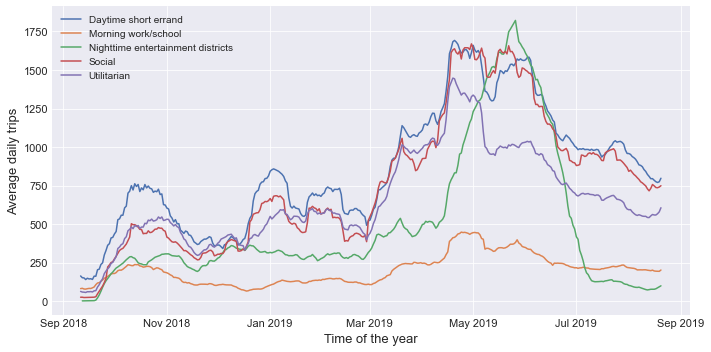

In [64]:
style.use('seaborn-darkgrid')
sns.set_palette("deep")
from matplotlib.dates import DateFormatter
# custom_palette=sns.color_palette("deep", 5)
fig, ax = plt.subplots(figsize=(10, 5))
for i in rolling_avg_df.columns:
    plt.plot(rolling_avg_df[i].rolling(21,center=True).mean(), label=i)

date_form = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_form)

#axis label
plt.xlabel('Time of the year', fontsize=13)
plt.ylabel('Average daily trips', fontsize=13)

_ = ax.tick_params(axis='both', which='major', labelsize=11)
_ = ax.tick_params(axis='both', which='minor', labelsize=11)
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('results/TemporalDistribution_RegroupedCluster_TimeOfYear_TimeZoneCorrected_V10_10012021.png', dpi=300)
plt.legend()

### Day of the week

In [65]:
time_ofday_data = kmean_results[[
    'trip_id','DATE_str', 'reclassified_cluster', 'trip_start_week_no',
    'trip_start_hour_no'
]].groupby(
    ['DATE_str','trip_start_week_no', 'trip_start_hour_no',
     'reclassified_cluster']).count().rename(columns={'trip_id': 'count'}).reset_index()


# week_no_value=6
def relabeled_weekno(week_no_value):
    if week_no_value < 4:
        return 0
    elif week_no_value == 4:
        return 1
    else:
        return week_no_value-3


time_ofday_data['week_day'] = time_ofday_data.apply(
    lambda x: relabeled_weekno(x['trip_start_week_no']), axis=1)


print(time_ofday_data['count'].sum())

time_ofday_plot_df = pd.pivot_table(data=time_ofday_data,
                               index=['week_day', 'trip_start_hour_no'],
                               columns='reclassified_cluster',
                               values='count',
                               aggfunc='mean').fillna(0)
time_ofday_plot_df

1050497


reclassified_cluster         Daytime short errand  Morning work/school  \
week_day trip_start_hour_no                                              
0        1                                    0.0                  0.0   
         2                                    0.0                  0.0   
         3                                    0.0                  0.0   
         4                                    0.0                  0.0   
         5                                    0.0                  0.0   
...                                           ...                  ...   
3        20                                   0.0                  0.0   
         21                                   0.0                  0.0   
         22                                   0.0                  0.0   
         23                                   0.0                  0.0   
         24                                   0.0                  0.0   

reclassified_cluster         Nighttime entertainment districts  Social  \
week_day trip_start_hour_no                                              
0        1                                           36.724359     0.0   
         2                                           22.935484     0.0   
         3                                           14.655629     0.0   
         4                                            8.458647     0.0   
         5                                            5.907801     0.0   
...                                                        ...     ...   
3        20                                           0.000000   152.0   
         21                                         119.708333     0.0   
         22                                          95.069767     0.0   
         23                                          72.292683     0.0   
         24                                          45.850000     0.0   

reclassified_cluster         Utilitarian  
week_day trip_start_hour_no               
0        1                      1.416667  
         2                      1.250000  
         3                      1.600000  
         4                      1.000000  
         5                      1.000000  
...                                  ...  
3        20                    37.583333  
         21                     1.785714  
         22                     1.428571  
         23                     1.583333  
         24                     1.750000  

[96 rows x 5 columns]

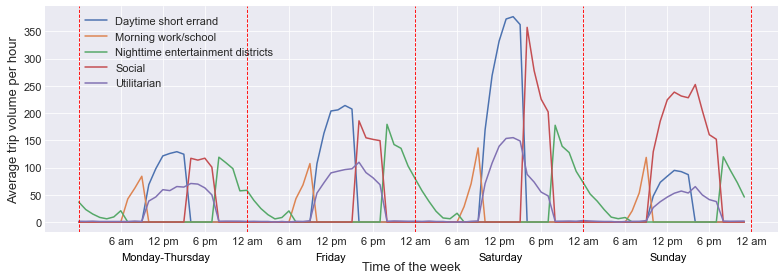

In [72]:
#creating column for weekday no
# data['week_no'] = data.apply(lambda x: x['startDateTime'].weekday(), axis=1)
# data['hour_no'] = data.apply(lambda x: x['startDateTime'].hour, axis=1)
style.use('seaborn-darkgrid')
sns.set_palette("deep")

fig, ax = plt.subplots(figsize=(11, 4))

# for i in np.arange(0, total_clusters, 1):
#     plot_data = kmean_results[kmean_results[selected_cluster] == i]

#     plot_data.groupby(['trip_start_week_no', 'trip_start_hour_no'
#                        ]).size().plot(ax=ax)

time_ofday_plot_df.plot(ax=ax)

for x in np.arange(0, 24 * 5, 24):
    ax.axvline(x=x, color='red', linewidth=0.9, linestyle='--')

day_label = ['Monday-Thursday', 'Friday', 'Saturday', 'Sunday']
day_label_position=[6,33.8,57.1,81.5]

for x in np.arange(1, 5, 1):
    ax.text(day_label_position[x - 1],#-20 + 0.5 * len(day_label[x - 1]) + 24 * x,
            -70,
            day_label[x - 1],
            color='black',
            fontsize=11)

# axis tick label
# ax.set_yticklabels['12,24']

# ax.xaxis.set_minor_locator(MultipleLocator(6))
# ax.xaxis.set_major_locator(MultipleLocator(12))
# ax.set_xticklabels([0, 0, 12, 24, 12, 24, 12, 24, 12, 24, 24, 24, 24])

plt.xticks(np.arange(0,24*4+6,6),['']+['6 am','12 pm','6 pm','12 am']*4)

#axis label
plt.xlabel('Time of the week', fontsize=13, labelpad=15)
plt.ylabel('Average trip volume per hour', fontsize=13)

_ = ax.tick_params(axis='both', which='major', labelsize=11)
_ = ax.tick_params(axis='both', which='minor', labelsize=11)
plt.legend(fontsize=11,loc='upper left', bbox_to_anchor=(0.04, 1))
plt.tight_layout()
plt.savefig('results/TemporalDistribution_RegroupedCluster_TimeOfWeek_TimeZoneCorrected_V10_10012021.png', dpi=300)



## Spatial plot data

In [67]:
kmeans_results_export=kmean_results[['trip_id','reclassified_cluster']]


# Landuse classification by grid
grid_clf=gpd.read_file('_Data/Landuse data/Shapefiles/LandUse_Classification.shp')
grid_clf_byGrid=grid_clf[['Fishnet_25','Landuse']]


#grid id for trip origin and destination
trip_grid = gpd.read_file('_Data/Landuse data/Shapefiles/Start_end_grid_AllSegment.shp')
trip_grid=trip_grid[['trip_id', 'GRID_ID','GRID_ID_1']].rename(columns={'GRID_ID':'Origin_GRID',
                                                             'GRID_ID_1':'Destination_GRID'})

#merge
chord_diagram_df = pd.merge(kmeans_results_export,
                            trip_grid,
                            on='trip_id',
                            how='left')
chord_diagram_df['Origin_Landuse'] = chord_diagram_df['Origin_GRID'].map(
    dict(dict(grid_clf_byGrid.values)))
chord_diagram_df['Distination_Landuse'] = chord_diagram_df['Destination_GRID'].map(
    dict(dict(grid_clf_byGrid.values)))
chord_diagram_df

,trip_id,reclassified_cluster,Origin_GRID,Destination_GRID,Origin_Landuse,Distination_Landuse
0,9,Morning work/school,DN-110,DR-111,downtown,others
1,10,Morning work/school,DK-106,DL-107,park,park
2,11,Morning work/school,DO-110,DM-106,park,others
3,12,Morning work/school,DM-110,DN-110,park,downtown
4,13,Morning work/school,DO-110,DM-106,park,others
...,...,...,...,...,...,...
1050492,1547656,Social,NaN,NaN,NaN,NaN
1050493,1547657,Utilitarian,NaN,NaN,NaN,NaN
1050494,1547658,Social,NaN,NaN,NaN,NaN
1050495,1547659,Social,NaN,NaN,NaN,NaN


In [68]:
# Distribution of NaN values by grouped clusters
chord_diagram_df[chord_diagram_df.isna().any(axis=1)]['reclassified_cluster'].value_counts()

Daytime short errand                 38667
Social                               35378
Nighttime entertainment districts    25336
Utilitarian                          20599
Morning work/school                   8394
Name: reclassified_cluster, dtype: int64

In [69]:
crosstab_Landuse=pd.crosstab(chord_diagram_df['Origin_Landuse'],
                            [chord_diagram_df['Distination_Landuse']],
                            margins=False)
crosstab_Landuse.to_csv('_Data/Chord diagram/crosstab_landuse_TimeZoneCorrected_V10_10012021.csv')
crosstab_Landuse

Distination_Landuse,commercial,downtown,others,park,vanderbilt
Origin_Landuse,,,,,
commercial,62891,49211,41012,12852,11732
downtown,40162,173083,44410,44598,5629
others,28696,41503,58007,22944,11760
park,12976,45790,27386,71897,8353
vanderbilt,12559,7938,16157,8367,62210


In [70]:
crosstab_Landuse_withUseType = pd.crosstab(chord_diagram_df['Origin_Landuse'],
                                           [chord_diagram_df['Distination_Landuse'],
                                               chord_diagram_df['reclassified_cluster']],
                                           margins=False)
crosstab_Landuse_withUseType.to_csv(
    '_Data/Chord diagram/crosstab_landuse_withUseType_TimeZoneCorrected_V10_100120211.csv')
crosstab_Landuse_withUseType

Distination_Landuse            commercial                      \
reclassified_cluster Daytime short errand Morning work/school   
Origin_Landuse                                                  
commercial                          25078                3773   
downtown                            13298                1929   
others                               8824                1970   
park                                 2883                 669   
vanderbilt                           3028                 962   

Distination_Landuse                                                        \
reclassified_cluster Nighttime entertainment districts Social Utilitarian   
Origin_Landuse                                                              
commercial                                       10493  18242        5305   
downtown                                          6097  12323        6515   
others                                            4806   7915        5181   
park                                              1565   2576        5283   
vanderbilt                                        1599   2438        4532   

Distination_Landuse              downtown                      \
reclassified_cluster Daytime short errand Morning work/school   
Origin_Landuse                                                  
commercial                          18293                3774   
downtown                            66455               11189   
others                               6536                4208   
park                                16092                3209   
vanderbilt                           1769                 801   

Distination_Landuse                                                        \
reclassified_cluster Nighttime entertainment districts Social Utilitarian   
Origin_Landuse                                                              
commercial                                        6019  15633        5492   
downtown                                         27658  60901        6880   
others                                            6029   9124       15606   
park                                              6359  14783        5347   
vanderbilt                                         955   2179        2234   

Distination_Landuse   ...                 park                      \
reclassified_cluster  ... Daytime short errand Morning work/school   
Origin_Landuse        ...                                            
commercial            ...                 3189                1225   
downtown              ...                14392                2582   
others                ...                 3357                2584   
park                  ...                26443                4386   
vanderbilt            ...                 1553                 647   

Distination_Landuse                                                        \
reclassified_cluster Nighttime entertainment districts Social Utilitarian   
Origin_Landuse                                                              
commercial                                        1424   2633        4381   
downtown                                          6816  14419        6389   
others                                            3089   3750       10164   
park                                              8171  19039       13858   
vanderbilt                                         761    980        4426   

Distination_Landuse            vanderbilt                      \
reclassified_cluster Daytime short errand Morning work/school   
Origin_Landuse                                                  
commercial                           2721                1458   
downtown                              751                 224   
others                               2616                1504   
park                                  873                 717   
vanderbilt                           5418                7370   

Distination_Landuse      